In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [3]:
# Import dataset, print columns and top rows
df = pd.read_csv(r"C:\Users\hp\Downloads\Telecom+Customer+Churn\telecom_customer_churn.csv")
print(f"This shows the columns in the dataset\n{df.columns}\n")
print(df.info())

This shows the columns in the dataset
Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  

In [4]:
# Define target variable
target_variable = df['Customer Status']
target_variable.value_counts() # this shows the number of churned customer, and the customers that stayed.

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

#### Angle of Analysis
- Understand the pattern of null values.
- Understand different variables that have an impact on churn. 
- Clean and set up for analysis

In [5]:
# understand pattern associated with null values. 
cols_with_consistent_nulls = ['Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']

# show null values which happens to be consistent across where phone service is yes 
df[(df['Internet Type'].isnull()) & (df['Phone Service'] == "Yes")]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
20,0023-UYUPN,Female,79,Yes,0,Ahwahnee,93601,37.375816,-119.739935,0,50,NaN,Yes,31.43,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,No,Bank Withdrawal,25.20,1306.30,0.00,0,1571.50,2877.80,Stayed,NaN,NaN
23,0030-FNXPP,Female,22,No,0,Keeler,93530,36.560498,-117.962461,0,3,NaN,Yes,3.12,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.85,57.20,0.00,0,9.36,66.56,Joined,NaN,NaN
24,0031-PVLZI,Female,34,Yes,0,Korbel,95550,40.766600,-123.804580,0,4,Offer E,Yes,12.43,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,20.35,76.35,0.00,0,49.72,126.07,Churned,Price,Long distance charges
27,0040-HALCW,Male,42,Yes,3,Modesto,95358,37.612612,-121.108568,3,54,NaN,Yes,19.70,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Credit Card,20.40,1090.60,0.00,0,1063.80,2154.40,Stayed,NaN,NaN
28,0042-JVWOJ,Male,64,No,0,Glen Ellen,95442,38.368744,-122.522642,0,26,Offer C,Yes,37.70,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,Yes,Bank Withdrawal,19.60,471.85,21.25,0,980.20,1430.80,Stayed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,9970-QBCDA,Female,50,No,0,March Air Reserve Base,92518,33.888323,-117.277533,0,6,Offer E,Yes,31.02,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.70,129.55,0.00,0,186.12,315.67,Stayed,NaN,NaN
7028,9972-EWRJS,Female,56,Yes,1,Meadow Valley,95956,39.937017,-121.058043,2,67,Offer A,Yes,48.75,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,Yes,Bank Withdrawal,19.25,1372.90,0.00,0,3266.25,4639.15,Stayed,NaN,NaN
7032,9975-GPKZU,Male,62,Yes,3,Alameda,94501,37.774633,-122.274434,0,46,NaN,Yes,7.67,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Credit Card,19.75,856.50,0.00,0,352.82,1209.32,Stayed,NaN,NaN
7033,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.559709,-120.345639,0,1,Offer E,Yes,49.51,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,18.90,18.90,0.00,0,49.51,68.41,Joined,NaN,NaN


This means the consistent null values for the columns in cols_with_consistent_nulls are for customers with access to Phone Service (Phone Service == yes)
and no access to internet service

In [6]:
# Since churn category and reason is relevant to the analysis, it is important to calculate the null percentage of these 2 columns
for i in ['Churn Category', 'Churn Reason']:
    print(f" The null percentage for {i} is : {df[i].isnull().mean()*100}")

 The null percentage for Churn Category is : 73.4630129206304
 The null percentage for Churn Reason is : 73.4630129206304


In [7]:
# calculate null percentage
for i in ['Avg Monthly Long Distance Charges', 'Multiple Lines', 'Offer']:
    print(f" The null percentage for {i} is : {df[i].isnull().mean()*100}")

 The null percentage for Avg Monthly Long Distance Charges is : 9.683373562402386
 The null percentage for Multiple Lines is : 9.683373562402386
 The null percentage for Offer is : 55.047564958114435


In [8]:
# Descriptive stats for numerical variables
include = []
exclude = ['Zip Code', 'Latitude', 'Longitude']
for cols in df.select_dtypes(['int', 'float']).columns:
    if cols not in exclude:
        include.append(cols)
df[include].describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


### Exploratory Data Analysis and Feature Selection

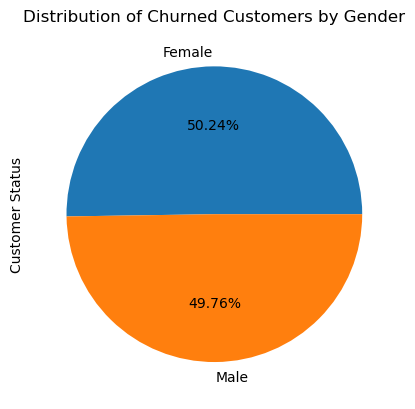

In [9]:
# Gender distribution for churned customers
churn_data = df[df['Customer Status']== "Churned"]
churn_data.groupby('Gender')['Customer Status'].count().sort_values(ascending = False).plot.pie(autopct = "%0.2f%%")
plt.xticks(rotation = 0)
plt.title('Distribution of Churned Customers by Gender')
plt.show()

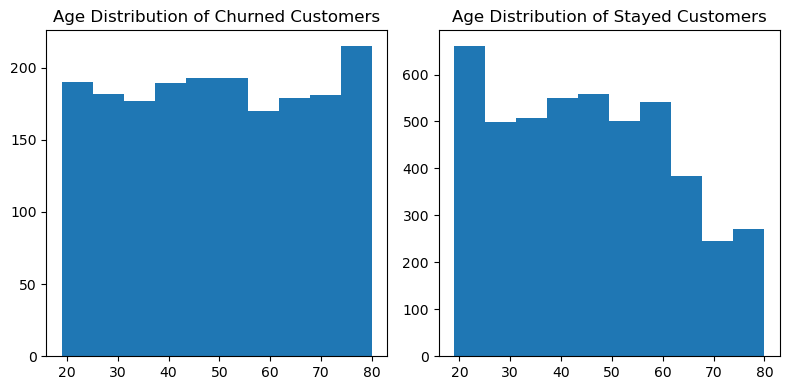

In [10]:
# Age distribution for churned customers vs stayed customers
stay_data = df[df['Customer Status'] == 'Stayed']

plt.figure(figsize = (8, 4))

plt.subplot(1,2,1)
plt.hist(churn_data['Age'])
plt.title('Age Distribution of Churned Customers')

plt.subplot(1,2,2)
plt.hist(stay_data['Age'])
plt.title('Age Distribution of Stayed Customers')

plt.tight_layout()

### Build a hypothesis test to determine relationship between selected categorical variable and the target variable.
Null Hypothesis: There is no relationship between selected variable and target variable.

alpha = 0.05

In [11]:
from scipy.stats import chi2_contingency
df_categ = df.select_dtypes('object')
df_categ.columns

Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [12]:
alpha = 0.05
for var in df_categ.columns:
    if var not in ['Customer Status','Churn Category','Church Reason']:
        conti_table = pd.crosstab(df_categ[var], df_categ['Customer Status'])
        chi2, pvalue, _, _ = chi2_contingency(conti_table)
        print(chi2)
        print(pvalue)
        if pvalue < alpha:
            print(f'Reject Null Hypothesis: There is a relationship between {var} and customer status \n')
        else:
            print(f'Accept Null Hypothesis: No relationship between {var} and customer status\n')

14085.999999999998
0.49366179633979285
Accept Null Hypothesis: No relationship between Customer ID and customer status

2.071831839095429
0.35490117109455394
Accept Null Hypothesis: No relationship between Gender and customer status

394.15343021714676
2.5743649669241746e-86
Reject Null Hypothesis: There is a relationship between Married and customer status 

2497.670087617971
1.57578925706343e-05
Reject Null Hypothesis: There is a relationship between City and customer status 

1191.5020515811636
6.574289825667373e-252
Reject Null Hypothesis: There is a relationship between Offer and customer status 

2.3288121807186317
0.3121079709316997
Accept Null Hypothesis: No relationship between Phone Service and customer status

230.95525484608132
7.058357104327157e-51
Reject Null Hypothesis: There is a relationship between Multiple Lines and customer status 

413.6518327978002
1.5019165169877086e-90
Reject Null Hypothesis: There is a relationship between Internet Service and customer status 


From the test, variables that can affect customer status include: Married, city, offer, payment method, paperless billing, contract, Internet type
online security, online backup, device protection plan, internet service, multiple line.

In [13]:
# Phone Service == Yes and Internet Service == No Analysis as it regards the churned
pd.crosstab(df['Phone Service'], df['Customer Status'], normalize = 'index')

Customer Status,Churned,Joined,Stayed
Phone Service,,,
No,0.249267,0.055718,0.695015
Yes,0.267096,0.065399,0.667505


In [14]:
# Check distribution for churned internet service
pd.crosstab(df['Internet Service'], df['Customer Status'], normalize = 'index')

Customer Status,Churned,Joined,Stayed
Internet Service,,,
No,0.074050,0.119266,0.806684
Yes,0.318289,0.049302,0.632409


- Most people that uses phone service gets churned.
- There is a significant difference between people that uses internet service and those who doesn't. Those who uses internet service gets churned the most.


### Analyzing categories with the highest churn risk for the different variables having a relationship with the target

In [15]:
categ = ['Device Protection Plan', 'Online Backup', 'Online Security', 'Internet Type', 'Paperless Billing', 'Payment Method', 
         'City', 'Offer', 'Married', 'Contract']
highest_values = []

for var in categ: # calculate churn amount for the different categories
    groups = churn_data.groupby(var)['Customer Status'].count().sort_values(ascending = False)
    highest_value = groups.index[0]
    highest_count = groups.values[0]
    highest_values.append({
            'Variable': var,
            'Category': highest_value,
            'Count': highest_count
        }) 
print(highest_values)

[{'Variable': 'Device Protection Plan', 'Category': 'No', 'Count': 1211}, {'Variable': 'Online Backup', 'Category': 'No', 'Count': 1233}, {'Variable': 'Online Security', 'Category': 'No', 'Count': 1461}, {'Variable': 'Internet Type', 'Category': 'Fiber Optic', 'Count': 1236}, {'Variable': 'Paperless Billing', 'Category': 'Yes', 'Count': 1400}, {'Variable': 'Payment Method', 'Category': 'Bank Withdrawal', 'Count': 1329}, {'Variable': 'City', 'Category': 'San Diego', 'Count': 185}, {'Variable': 'Offer', 'Category': 'Offer E', 'Count': 426}, {'Variable': 'Married', 'Category': 'No', 'Count': 1200}, {'Variable': 'Contract', 'Category': 'Month-to-Month', 'Count': 1655}]


In [16]:
churn_risk_category = pd.DataFrame(highest_values) # convert to dataframe
churn_risk_category

,Variable,Category,Count
0,Device Protection Plan,No,1211
1,Online Backup,No,1233
2,Online Security,No,1461
3,Internet Type,Fiber Optic,1236
4,Paperless Billing,Yes,1400
5,Payment Method,Bank Withdrawal,1329
6,City,San Diego,185
7,Offer,Offer E,426
8,Married,No,1200
9,Contract,Month-to-Month,1655


### Test on Numerical variables against target variable

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()